In [60]:
import numpy as np
import matplotlib.pyplot as plt
# A library for data manipulation and analysis.
import pandas as pd

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline 
#for consistent result of random numbers
np.random.seed(3) 

In [61]:
df = pd.read_csv("C:/pythonprojects/calculas_neural_network/datas/tvmarketing.csv")
df.head()
df.TV


0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

<Axes: xlabel='TV', ylabel='Sales'>

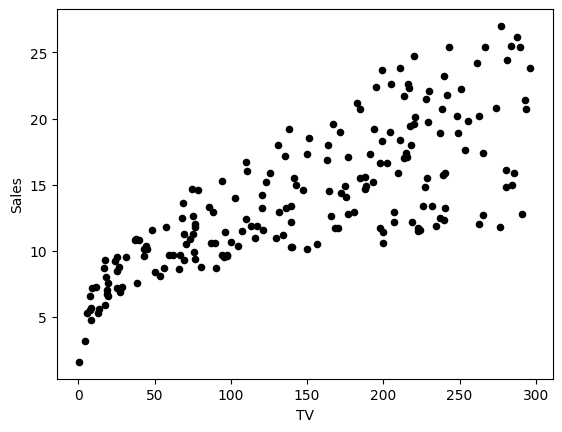

In [62]:
df.plot(x='TV', y='Sales', kind='scatter', c='black')

In [63]:
df_norm = (df - np.mean(df)) / np.std(df,axis = 0)  #normalizing the datasets for smooth operation
df_norm

,TV,Sales
0,1.746481,-11.227526
1,-0.420747,-13.475626
2,-0.739526,-13.686985
3,0.828679,-11.919249
4,1.170811,-12.995263
...,...,...
195,-0.494311,-14.013632
196,0.159594,-13.610127
197,1.126439,-13.014477
198,2.371194,-10.574233


(1, 200)

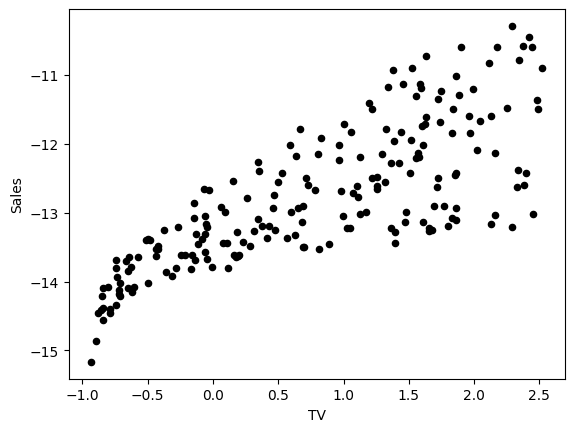

In [64]:
df_norm.plot(x='TV', y='Sales', kind='scatter', c='black')
X_norm = df_norm['TV']
Y_norm = df_norm['Sales']
X_norm = np.array(X_norm).reshape((1,len(X_norm)))  #converting the datasets into row vector which denotes one feature which is TV and multiple samples
X_norm
Y_norm = np.array(Y_norm).reshape((1,len(Y_norm)))    #1 row and 200 columns
Y_norm
Y_norm.shape


In [65]:
#defining the neural network structure
def layer_sizes(X, Y):
    n_x = X.shape[0]  #size of the input layer which is 1 in this case
    n_y = Y.shape[0]  #size of the output layer which is 1 in this case
    
    return (n_x, n_y)

(n_x, n_y) = layer_sizes(X_norm, Y_norm)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 1
The size of the output layer is: n_y = 1


In [66]:
def initialize_parameters(n_x,n_y):
    w = np.random.randn(n_y,n_x)*0.1  #generating a random value of size of  output neuron's row as row and the input neuron's row as the column 
    b = np.zeros((n_y,1))
    parameters = {
        'w':w,
        'b':b
    }
    return parameters
parameters = initialize_parameters(n_x,n_y)
parameters

{'w': array([[0.17886285]]), 'b': array([[0.]])}

In [67]:
def forward_propagation(X,parameters):  #this function gives us the predicted values
    weight = parameters['w']
    bias = parameters['b']
    output = (weight @ X) + bias  #matrix multiplication between weight and the input
    return output
Y_predicted = forward_propagation(X_norm,parameters)    


In [68]:
def cost_function(Y_predicted,Y):
    m=Y_predicted.shape[1]  #the total number of predicted data points of the passed number of samples 'm'
    return np.sum((Y_predicted - Y)**2) / (2*m)
cost_function(Y_predicted,Y_norm)    
    

np.float64(83.8197722439222)

In [69]:
def backward_propagation(Y_predicted,Y,X):  #here in backward_propagation function, we calculate the partial derivative of loss function with respect to weight of innput and the bias
    dLY = Y_predicted - Y  #partial derivative of loss function with respect to predicted data
    m = Y_predicted.shape[1]
    #the summation of the partial derivatives of loss function with respect to weight and the bias
    dLW = np.dot(dLY,X.T) / m   #partial derivative of loss function with respect to input #transposing the input X  for the matrix multiplication
    dLB = np.sum(dLY,axis = 1) / m    #partial derivative of loss function with respect to the bias
    grads = {
        'dw':dLW,
        'db':dLB
    }
    return grads
grads = backward_propagation(Y_predicted,Y_norm,X_norm)    
    
    
    

In [70]:
def update_parameters(parameters,gradients,learning_rate=0.1):
    weight = parameters['w']
    bias = parameters['b']
    dw = gradients['dw']
    db = gradients['db']
    weight = weight - (learning_rate * dw)
    bias = bias - (learning_rate * db)
    parameters = {
        'w':weight,
        'b':bias
    }
    return parameters
updated_paramters = update_parameters(parameters,grads,0.1)   
updated_paramters
    
    

{'w': array([[-0.76408854]]), 'b': array([[-1.29184896]])}

In [71]:
def neural_network_model(X,Y,iterations,learning_rate=0.1,print_cost=False):
    (n_x, n_y) = layer_sizes(X, Y)  #size of input and output neuron respectively
    parameters = initialize_parameters(n_x, n_y)  #the initial parameters
    for i in range(iterations):
        Y_predicted = forward_propagation(X,parameters)
        cost = cost_function(Y_predicted,Y)
        grads = backward_propagation(Y_predicted,Y,X)
        parameters =  update_parameters(parameters,grads,learning_rate=0.1)
        if print_cost:
            print(f'Cost function after iteration {i} is', cost)
            
    return parameters    
final_parameters = neural_network_model(X_norm,Y_norm,30,0.1,print_cost=False)    



In [72]:
X_pred = np.array([50, 120, 280])  #this is the marketing expense value
#X_mean = np.array(np.mean(X)).reshape((len(X.axes[1]),1))


In [96]:
def predict_value(X,Y,X_predict,parameters):
    X_mean = X.mean()
    X_std = X.std()
    X_predict_norm = ((X_predict - X_mean) / X_std).reshape((1,len(X_predict)))  #reshaping the array for matrix multiplication
    output = forward_propagation(X_predict_norm,parameters)
    return (output * Y.std()) + Y.mean()  #denormalizing the predicted outcome as we had normalized the input
Y_pred = predict_value(df['TV'],df['Sales'],X_pred,final_parameters)  
Y_pred
    

array([[-39.69058466, -42.87553647, -50.1554263 ]])

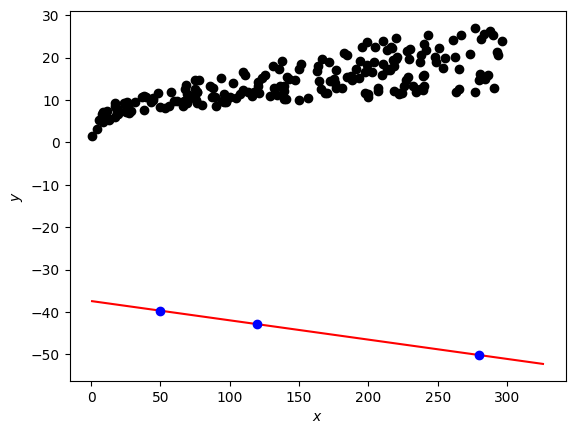

In [97]:
fig, ax = plt.subplots()
plt.scatter(df["TV"], df["Sales"], color="black")

plt.xlabel("$x$")
plt.ylabel("$y$")
    
X_line = np.arange(np.min(df["TV"]),np.max(df["TV"])*1.1, 0.1)
Y_line = predict_value(df["TV"], df["Sales"], X_line,final_parameters)
ax.plot(X_line, Y_line.flatten(), "r")
ax.plot(X_pred, Y_pred.flatten(), "bo")
plt.plot()
plt.show()

np.float64(147.0425)